In [1]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 8.0 MB/s eta 0:00:00


In [3]:
# 한국어 데이터 : konlpy
# kkma : 서울대, 최신단어반영 x
# okt : 트위터에서 만든 형태소 분석기

from konlpy.tag import Kkma, Okt

In [4]:
from collections import Counter


In [4]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 44.5 MB/s eta 0:00:00


In [13]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/IMbank_텍스트마이닝/텍스트마이닝_1014/news_data.xls")

In [14]:
# '제목'과 '본문'을 합쳐 '제목+본문' 컬럼 생성
df['제목+본문'] = df['제목'] + ' ' + df['본문']
df

,제목,본문,기업명,제목+본문
0,"은행권 수천억 금융사고, 회수율 고작 9.1%… KB국민은행 회수율 0.7%, 5대...","대상자로 선정되면 경상북도와 협약을 맺은 2개 은행(NH농협은행,IM뱅크)에서 최대...",iM뱅크,"은행권 수천억 금융사고, 회수율 고작 9.1%… KB국민은행 회수율 0.7%, 5대..."
1,"iM뱅크, 대구대와 '아이엠 유니즈' 플랫폼 구축 MOU",iM뱅크(옛 대구은행·부행장 김기만·사진 오른쪽)는 지난 11일 대구대학교(총장 박...,iM뱅크,"iM뱅크, 대구대와 '아이엠 유니즈' 플랫폼 구축 MOU iM뱅크(옛 대구은행·부행..."
2,"포항시, 소상공인 특례보증 1114억 조성",iM뱅크는 대구대학교와 스마트캠퍼스 플랫폼 ‘아이엠 유니즈’ 구축을 위한 전략적 업...,iM뱅크,"포항시, 소상공인 특례보증 1114억 조성 iM뱅크는 대구대학교와 스마트캠퍼스 플랫..."
3,DGB금융그룹 ‘단디 JOB자! 페스티벌’,전자출결 등 제공 [시장경제=정우교 기자] 지난 11일 대구대학교에서 개최된 협약식...,iM뱅크,DGB금융그룹 ‘단디 JOB자! 페스티벌’ 전자출결 등 제공 [시장경제=정우교 기자...
4,"iM뱅크‧대구대, 스마트캠퍼스 플랫폼 '아이엠 유니즈' 구축 협약",iM뱅크는 14일 대구대와 스마트캠퍼스 플랫폼인 '아이엠 유니즈(iM uniz)' ...,iM뱅크,"iM뱅크‧대구대, 스마트캠퍼스 플랫폼 '아이엠 유니즈' 구축 협약 iM뱅크는 14일..."
...,...,...,...,...
202,"임영웅,하나은행과 함께 한 자선축구대회 성공적 마무리",부천하나은행여자농구단은 지난 12일 농구단 연고지인 부천시에 위치한 원미노인복지관을...,하나은행,"임영웅,하나은행과 함께 한 자선축구대회 성공적 마무리 부천하나은행여자농구단은 지난 ..."
203,"하나은행, 제 32회 자연사랑 어린이 미술대회 시상식 개최",하나은행과 신한은행은 금융사고 이슈에서 자유로운 게 사실이다. 올초에는 홍콩 ELS...,하나은행,"하나은행, 제 32회 자연사랑 어린이 미술대회 시상식 개최 하나은행과 신한은행은 금..."
204,"하나은행, 임영웅과 자선축구대회 열었다",▲하나은행은 지난 12일 인천 청라에 위치한 하나글로벌캠퍼스에서 제 32회 자연사랑...,하나은행,"하나은행, 임영웅과 자선축구대회 열었다 ▲하나은행은 지난 12일 인천 청라에 위치한..."
205,"하나은행, 임영웅과 함께한 자선축구대회 성료...3만5000여명 구름관중...",포쓰저널 오경선 기자하나은행은 지난 2024년 10월 12일 인천 청라에 위치한 '...,하나은행,"하나은행, 임영웅과 함께한 자선축구대회 성료...3만5000여명 구름관중... 포쓰..."


In [39]:
okt = Okt()

total = []


for i in range(len(df)):
    a = df.iloc[i]
    enterprise = a['기업명']
    text = okt.nouns(a['제목+본문'])
    box = []
    for j in text:
        if len(j) >= 2:
            box.append(j)
    counter = Counter(box).most_common()
    sample = pd.DataFrame(counter, columns = ['단어', '빈도'])
    if enterprise == "iM뱅크":
        sample['기업명'] = "iM뱅크"
    if enterprise =="하나은행":
        sample['기업명'] = "하나은행"
    total.append(sample)

In [40]:
df = pd.concat(total, ignore_index=True)
df2 = df.pivot_table(index = "단어", columns = "기업명",
                     values = "빈도").fillna(0)

df2["iM뱅크"] = (df2['iM뱅크'] + 1) / sum(df2['iM뱅크'] + 1)
df2["하나은행"] = (df2['하나은행'] + 1) / sum(df2['하나은행'] + 1)
# Odds Ratio 계산: iM뱅크 기준
df2['Odds Ratio'] = df2["iM뱅크"] / df2["하나은행"]
df2.sort_values("Odds Ratio", ascending = False)

기업명,iM뱅크,하나은행,Odds Ratio
단어,,,
김천,0.003453,0.000522,6.609402
공급,0.002959,0.000522,5.665202
제품,0.002466,0.000522,4.721001
포럼,0.001973,0.000522,3.776801
청년,0.001758,0.000522,3.365227
...,...,...,...
담대,0.000493,0.001567,0.314733
납부,0.000493,0.001828,0.269772
부천시,0.000493,0.001881,0.262278


In [13]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,004 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123621 files and dire

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

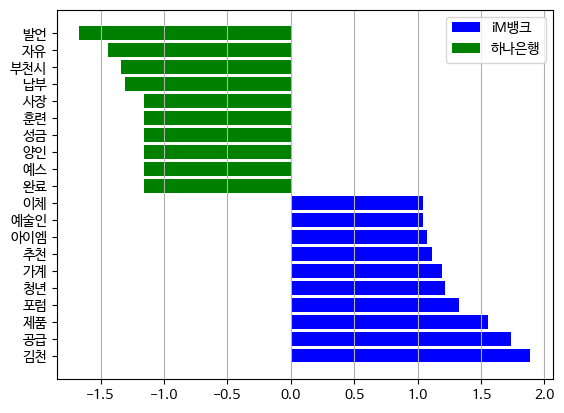

In [42]:
import numpy as np
import matplotlib.pyplot as plt


df2['Log Odds Ratio'] = np.log(df2['Odds Ratio'])
df2 = df2.sort_values('Log Odds Ratio', ascending = False)

a = df2.head(10)
b = df2.tail(10)

df3 = pd.concat([a, b])

plt.barh(a.index, a['Log Odds Ratio'], color = 'blue', label = 'iM뱅크')
plt.barh(b.index, b['Log Odds Ratio'], color = 'green', label = '하나은행')
plt.grid(axis = 'x')
plt.legend()
plt.show()

#### d

In [15]:
okt = Okt()
def make_nouns(x):
    nouns = okt.nouns(x) # 명사 추출 후 저장
    box = []
    for i in nouns:
        if len(i) >= 2: # 길이가 2 이상만 저장
            box.append(i)
    return box

df['명사추출'] = df['제목+본문'].apply(make_nouns)

In [16]:
df

,제목,본문,기업명,제목+본문,명사추출
0,"은행권 수천억 금융사고, 회수율 고작 9.1%… KB국민은행 회수율 0.7%, 5대...","대상자로 선정되면 경상북도와 협약을 맺은 2개 은행(NH농협은행,IM뱅크)에서 최대...",iM뱅크,"은행권 수천억 금융사고, 회수율 고작 9.1%… KB국민은행 회수율 0.7%, 5대...","[은행권, 금융, 사고, 회수, 고작, 국민은행, 회수, 대상자, 선정, 경상북도,..."
1,"iM뱅크, 대구대와 '아이엠 유니즈' 플랫폼 구축 MOU",iM뱅크(옛 대구은행·부행장 김기만·사진 오른쪽)는 지난 11일 대구대학교(총장 박...,iM뱅크,"iM뱅크, 대구대와 '아이엠 유니즈' 플랫폼 구축 MOU iM뱅크(옛 대구은행·부행...","[뱅크, 대구대, 아이엠, 유니, 플랫폼, 구축, 뱅크, 대구, 은행, 부행, 김기..."
2,"포항시, 소상공인 특례보증 1114억 조성",iM뱅크는 대구대학교와 스마트캠퍼스 플랫폼 ‘아이엠 유니즈’ 구축을 위한 전략적 업...,iM뱅크,"포항시, 소상공인 특례보증 1114억 조성 iM뱅크는 대구대학교와 스마트캠퍼스 플랫...","[포항시, 소상, 공인, 특례, 보증, 조성, 뱅크, 대구대학교, 스마트, 캠퍼스,..."
3,DGB금융그룹 ‘단디 JOB자! 페스티벌’,전자출결 등 제공 [시장경제=정우교 기자] 지난 11일 대구대학교에서 개최된 협약식...,iM뱅크,DGB금융그룹 ‘단디 JOB자! 페스티벌’ 전자출결 등 제공 [시장경제=정우교 기자...,"[금융, 그룹, 단디, 페스티벌, 전자, 출결, 제공, 시장경제, 정우, 기자, 지..."
4,"iM뱅크‧대구대, 스마트캠퍼스 플랫폼 '아이엠 유니즈' 구축 협약",iM뱅크는 14일 대구대와 스마트캠퍼스 플랫폼인 '아이엠 유니즈(iM uniz)' ...,iM뱅크,"iM뱅크‧대구대, 스마트캠퍼스 플랫폼 '아이엠 유니즈' 구축 협약 iM뱅크는 14일...","[뱅크, 대구대, 스마트, 캠퍼스, 플랫폼, 아이엠, 유니, 구축, 협약, 뱅크, ..."
...,...,...,...,...,...
202,"임영웅,하나은행과 함께 한 자선축구대회 성공적 마무리",부천하나은행여자농구단은 지난 12일 농구단 연고지인 부천시에 위치한 원미노인복지관을...,하나은행,"임영웅,하나은행과 함께 한 자선축구대회 성공적 마무리 부천하나은행여자농구단은 지난 ...","[임영웅, 하나은행, 자선, 축구, 대회, 성공, 마무리, 부천, 하나은행, 여자,..."
203,"하나은행, 제 32회 자연사랑 어린이 미술대회 시상식 개최",하나은행과 신한은행은 금융사고 이슈에서 자유로운 게 사실이다. 올초에는 홍콩 ELS...,하나은행,"하나은행, 제 32회 자연사랑 어린이 미술대회 시상식 개최 하나은행과 신한은행은 금...","[하나은행, 자연사, 어린이, 미술, 대회, 시상식, 개최, 하나은행, 신한은행, ..."
204,"하나은행, 임영웅과 자선축구대회 열었다",▲하나은행은 지난 12일 인천 청라에 위치한 하나글로벌캠퍼스에서 제 32회 자연사랑...,하나은행,"하나은행, 임영웅과 자선축구대회 열었다 ▲하나은행은 지난 12일 인천 청라에 위치한...","[하나은행, 임영웅, 자선, 축구, 대회, 하나은행, 지난, 인천, 청라, 위치, ..."
205,"하나은행, 임영웅과 함께한 자선축구대회 성료...3만5000여명 구름관중...",포쓰저널 오경선 기자하나은행은 지난 2024년 10월 12일 인천 청라에 위치한 '...,하나은행,"하나은행, 임영웅과 함께한 자선축구대회 성료...3만5000여명 구름관중... 포쓰...","[하나은행, 임영웅, 자선, 축구, 대회, 여명, 구름, 관중, 경선, 기자, 하나..."


In [18]:
unique_words = set()
for i in df['명사추출']:
    #print(i) # 두 기업의 본문을 가져옴
    for j in i:
        #print(j) # 명사를 하나씩 가져옴
        unique_words.add(j) # 중복되지 않은 단어 저장

print(unique_words)

{'응원', '의성', '지난달', '시작', '단어', '도시', '신문', '프로', '투자', '농협', '소득', '공단', '대치', '급감', '학교', '흥미진진', '회복', '하반기', '상대', '푸드', '대회', '양인', '국민은행', '의미', '성장', '행보', '조국', '지난해', '역할', '환원', '인하', '세번', '본선', '리츠', '성광', '하나은행', '하나', '금지', '서도', '용액', '라면', '태그', '공지', '활성화', '이사회', '교수', '수탁', '마이', '유튜브', '탄소', '특례보증', '거래처', '가운데', '압력', '법적', '경제학', '김혜민', '유하영', '여자농구', '대상자', '단순', '지주회사', '시즌', '지식', '지원', '맑음', '계좌', '업무', '산출', '기관', '김서현', '랩핑', '오전', '이후', '경남', '그랜드', '신탁', '청년', '뉴욕', '사용', '상철', '어시스트', '유니폼', '운영', '자주', '그동안', '사랑', '별도', '저하', '프론트', '이상', '자회사', '개최', '부담', '천백억', '장대비', '시장경제', '이하', '투데이', '사장', '정상화', '자금', '공연', '특례', '종료', '전공', '의대', '플레이', '모집', '대답', '플리', '수단', '주택', '예스', '인기', '기업은행', '등급', '하나로', '세레모니', '방향', '율촌', '대조', '펀드', '보정', '모바일', '참석', '부천시', '법률', '어르신', '지배', '미모', '조합', '분야', '이익', '거래', '다시', '연구원', '실현', '국민카드', '수수료', '자연', '네트워크', '페스티벌', '다른', '계발', '행사', '농단', '협업', '자산', '낸싱', '스타', '예치', '김천', '오른', '다음', '입출', '방지', '몰

In [19]:
# DF : 단어가 몇개의 문서에 출현했는지
DF_dic = {}
for i in unique_words:
    # print(i) # 고유한 단어 중복되지 않은 단어들만 추출
    count = 0
    for j in df['명사추출']:
        if i in j: # 만약 i가 j라는 연설문에 단어가 있다면 딕셔너리로 count +1 증가하면서 저장, 몇번 출현했는지 계산
            count += 1
    DF_dic[i] = count

DF_dic

{'응원': 3,
 '의성': 1,
 '지난달': 1,
 '시작': 9,
 '단어': 8,
 '도시': 1,
 '신문': 2,
 '프로': 6,
 '투자': 3,
 '농협': 16,
 '소득': 4,
 '공단': 5,
 '대치': 1,
 '급감': 1,
 '학교': 8,
 '흥미진진': 1,
 '회복': 2,
 '하반기': 1,
 '상대': 1,
 '푸드': 1,
 '대회': 90,
 '양인': 1,
 '국민은행': 8,
 '의미': 1,
 '성장': 4,
 '행보': 1,
 '조국': 1,
 '지난해': 3,
 '역할': 1,
 '환원': 1,
 '인하': 2,
 '세번': 1,
 '본선': 25,
 '리츠': 1,
 '성광': 1,
 '하나은행': 103,
 '하나': 74,
 '금지': 1,
 '서도': 2,
 '용액': 1,
 '라면': 2,
 '태그': 5,
 '공지': 1,
 '활성화': 28,
 '이사회': 2,
 '교수': 1,
 '수탁': 3,
 '마이': 5,
 '유튜브': 1,
 '탄소': 1,
 '특례보증': 2,
 '거래처': 1,
 '가운데': 10,
 '압력': 1,
 '법적': 3,
 '경제학': 1,
 '김혜민': 1,
 '유하영': 1,
 '여자농구': 1,
 '대상자': 4,
 '단순': 1,
 '지주회사': 1,
 '시즌': 2,
 '지식': 1,
 '지원': 61,
 '맑음': 1,
 '계좌': 8,
 '업무': 27,
 '산출': 1,
 '기관': 4,
 '김서현': 1,
 '랩핑': 1,
 '오전': 2,
 '이후': 12,
 '경남': 20,
 '그랜드': 1,
 '신탁': 1,
 '청년': 39,
 '뉴욕': 1,
 '사용': 3,
 '상철': 2,
 '어시스트': 4,
 '유니폼': 1,
 '운영': 7,
 '자주': 1,
 '그동안': 3,
 '사랑': 1,
 '별도': 1,
 '저하': 1,
 '프론트': 1,
 '이상': 5,
 '자회사': 1,
 '개최': 108,
 '부담': 3,
 '천백억': 1,
 '

In [20]:
df2=df.explode('명사추출')[['기업명', '명사추출']]
df3 =df2.groupby(['기업명', '명사추출']).size().reset_index(name='TF') # 빈도
df3

,기업명,명사추출,TF
0,iM뱅크,가계,5
1,iM뱅크,가까이,1
2,iM뱅크,가속,1
3,iM뱅크,가운데,3
4,iM뱅크,가을,3
...,...,...,...
1400,하나은행,후반,3
1401,하나은행,후원,6
1402,하나은행,훈련,2
1403,하나은행,휴학,1


In [21]:
def make_DF(x):
    return DF_dic[x]

df3['DF'] = df3['명사추출'].apply(make_DF)
df3

,기업명,명사추출,TF,DF
0,iM뱅크,가계,5,2
1,iM뱅크,가까이,1,1
2,iM뱅크,가속,1,1
3,iM뱅크,가운데,3,10
4,iM뱅크,가을,3,4
...,...,...,...,...
1400,하나은행,후반,3,3
1401,하나은행,후원,6,16
1402,하나은행,훈련,2,1
1403,하나은행,휴학,1,1


In [32]:
# IDF: 총 문서  - 2/DF
df3['IDF'] = 2 / df3['DF']
df3['TF-IDF'] = df3['TF'] * df3['IDF'] # 어떤 단어가 가장 많이 사용됐는지 수치 Ex) 자소서 항목에서도 많이 사용됨
df3

,기업명,명사추출,TF,DF,IDF,TF-IDF
0,iM뱅크,가계,5,2,1.000000,5.00
1,iM뱅크,가까이,1,1,2.000000,2.00
2,iM뱅크,가속,1,1,2.000000,2.00
3,iM뱅크,가운데,3,10,0.200000,0.60
4,iM뱅크,가을,3,4,0.500000,1.50
...,...,...,...,...,...,...
1400,하나은행,후반,3,3,0.666667,2.00
1401,하나은행,후원,6,16,0.125000,0.75
1402,하나은행,훈련,2,1,2.000000,4.00
1403,하나은행,휴학,1,1,2.000000,2.00


In [33]:
df3[df3['기업명']=="iM뱅크"].sort_values("TF-IDF",ascending=False)

,기업명,명사추출,TF,DF,IDF,TF-IDF
118,iM뱅크,김천,6,1,2.000000,12.000000
54,iM뱅크,공급,5,1,2.000000,10.000000
543,iM뱅크,제품,4,1,2.000000,8.000000
690,iM뱅크,포럼,3,1,2.000000,6.000000
616,iM뱅크,청년,100,39,0.051282,5.128205
...,...,...,...,...,...,...
424,iM뱅크,위치,1,20,0.100000,0.100000
702,iM뱅크,하나은행,3,103,0.019417,0.058252
291,iM뱅크,성공,1,36,0.055556,0.055556
66,iM뱅크,구름,1,38,0.052632,0.052632


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

df["cb_nouns"]=df['명사추출'].apply(lambda x: ' '.join(x)) # 한 문장으로 만들어 줌
df

,제목,본문,기업명,제목+본문,명사추출,cb_nouns
0,"은행권 수천억 금융사고, 회수율 고작 9.1%… KB국민은행 회수율 0.7%, 5대...","대상자로 선정되면 경상북도와 협약을 맺은 2개 은행(NH농협은행,IM뱅크)에서 최대...",iM뱅크,"은행권 수천억 금융사고, 회수율 고작 9.1%… KB국민은행 회수율 0.7%, 5대...","[은행권, 금융, 사고, 회수, 고작, 국민은행, 회수, 대상자, 선정, 경상북도,...",은행권 금융 사고 회수 고작 국민은행 회수 대상자 선정 경상북도 협약 은행 농협 은...
1,"iM뱅크, 대구대와 '아이엠 유니즈' 플랫폼 구축 MOU",iM뱅크(옛 대구은행·부행장 김기만·사진 오른쪽)는 지난 11일 대구대학교(총장 박...,iM뱅크,"iM뱅크, 대구대와 '아이엠 유니즈' 플랫폼 구축 MOU iM뱅크(옛 대구은행·부행...","[뱅크, 대구대, 아이엠, 유니, 플랫폼, 구축, 뱅크, 대구, 은행, 부행, 김기...",뱅크 대구대 아이엠 유니 플랫폼 구축 뱅크 대구 은행 부행 김기만 사진 오른쪽 지난...
2,"포항시, 소상공인 특례보증 1114억 조성",iM뱅크는 대구대학교와 스마트캠퍼스 플랫폼 ‘아이엠 유니즈’ 구축을 위한 전략적 업...,iM뱅크,"포항시, 소상공인 특례보증 1114억 조성 iM뱅크는 대구대학교와 스마트캠퍼스 플랫...","[포항시, 소상, 공인, 특례, 보증, 조성, 뱅크, 대구대학교, 스마트, 캠퍼스,...",포항시 소상 공인 특례 보증 조성 뱅크 대구대학교 스마트 캠퍼스 플랫폼 아이엠 유니...
3,DGB금융그룹 ‘단디 JOB자! 페스티벌’,전자출결 등 제공 [시장경제=정우교 기자] 지난 11일 대구대학교에서 개최된 협약식...,iM뱅크,DGB금융그룹 ‘단디 JOB자! 페스티벌’ 전자출결 등 제공 [시장경제=정우교 기자...,"[금융, 그룹, 단디, 페스티벌, 전자, 출결, 제공, 시장경제, 정우, 기자, 지...",금융 그룹 단디 페스티벌 전자 출결 제공 시장경제 정우 기자 지난 대구대학교 개최 ...
4,"iM뱅크‧대구대, 스마트캠퍼스 플랫폼 '아이엠 유니즈' 구축 협약",iM뱅크는 14일 대구대와 스마트캠퍼스 플랫폼인 '아이엠 유니즈(iM uniz)' ...,iM뱅크,"iM뱅크‧대구대, 스마트캠퍼스 플랫폼 '아이엠 유니즈' 구축 협약 iM뱅크는 14일...","[뱅크, 대구대, 스마트, 캠퍼스, 플랫폼, 아이엠, 유니, 구축, 협약, 뱅크, ...",뱅크 대구대 스마트 캠퍼스 플랫폼 아이엠 유니 구축 협약 뱅크 대구대 스마트 캠퍼스...
...,...,...,...,...,...,...
202,"임영웅,하나은행과 함께 한 자선축구대회 성공적 마무리",부천하나은행여자농구단은 지난 12일 농구단 연고지인 부천시에 위치한 원미노인복지관을...,하나은행,"임영웅,하나은행과 함께 한 자선축구대회 성공적 마무리 부천하나은행여자농구단은 지난 ...","[임영웅, 하나은행, 자선, 축구, 대회, 성공, 마무리, 부천, 하나은행, 여자,...",임영웅 하나은행 자선 축구 대회 성공 마무리 부천 하나은행 여자 농구단 지난 농구단...
203,"하나은행, 제 32회 자연사랑 어린이 미술대회 시상식 개최",하나은행과 신한은행은 금융사고 이슈에서 자유로운 게 사실이다. 올초에는 홍콩 ELS...,하나은행,"하나은행, 제 32회 자연사랑 어린이 미술대회 시상식 개최 하나은행과 신한은행은 금...","[하나은행, 자연사, 어린이, 미술, 대회, 시상식, 개최, 하나은행, 신한은행, ...",하나은행 자연사 어린이 미술 대회 시상식 개최 하나은행 신한은행 금융 사고 이슈 사...
204,"하나은행, 임영웅과 자선축구대회 열었다",▲하나은행은 지난 12일 인천 청라에 위치한 하나글로벌캠퍼스에서 제 32회 자연사랑...,하나은행,"하나은행, 임영웅과 자선축구대회 열었다 ▲하나은행은 지난 12일 인천 청라에 위치한...","[하나은행, 임영웅, 자선, 축구, 대회, 하나은행, 지난, 인천, 청라, 위치, ...",하나은행 임영웅 자선 축구 대회 하나은행 지난 인천 청라 위치 하나 글로벌 캠퍼스 ...
205,"하나은행, 임영웅과 함께한 자선축구대회 성료...3만5000여명 구름관중...",포쓰저널 오경선 기자하나은행은 지난 2024년 10월 12일 인천 청라에 위치한 '...,하나은행,"하나은행, 임영웅과 함께한 자선축구대회 성료...3만5000여명 구름관중... 포쓰...","[하나은행, 임영웅, 자선, 축구, 대회, 여명, 구름, 관중, 경선, 기자, 하나...",하나은행 임영웅 자선 축구 대회 여명 구름 관중 경선 기자 하나은행 지난 인천 청라...


In [35]:
model = TfidfVectorizer()
tf_idf = model.fit_transform(df['cb_nouns'])
result=pd.DataFrame(tf_idf.toarray(), index = df['기업명'],
                    columns = model.get_feature_names_out())
result

,가계,가까이,가능성,가두,가상,가속,가수,가운데,가을,가장,...,효과,효문,후반,후보,후원,훈련,휴학,흥미진진,희망,히어로
기업명,,,,,,,,,,,,,,,,,,,,,
iM뱅크,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
iM뱅크,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
iM뱅크,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
iM뱅크,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
iM뱅크,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
하나은행,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
하나은행,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.137020,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
하나은행,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176447,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [36]:
columns = model.get_feature_names_out()

for i in range(len(result)):
    a= result.iloc[i]
    idx = np.argsort(a)[-5:] # 값이 가장 큰 걸 가져옴
    print(columns[idx])

['임차보증금' '원기준' '고작' '회수' '최대']
['사진' '구축' '아이엠' '유니' '플랫폼']
['아이엠' '구축' '유니' '대학생' '플랫폼']
['출결' '협약' '정우' '시장경제' '대구대학교']
['협약' '플랫폼' '아이엠' '유니' '대구대']
['원기준' '기량' '내년' '북도' '최대']
['대상자' '선정' '전쟁' '신혼부부' '금융기관']
['협업' '논의' '대구대학교' '뱅크' '아이엠']
['방향' '마켓' '플리' '소품' '제품']
['뱅크' '구축' '유니' '플랫폼' '아이엠']
['제주' '회수' '사고' '금액' '은행']
['양성' '이바지' '아이엠' '뱅크' '대구대학교']
['상환' '감축' '주간' '실적' '증가']
['유니' '모바일' '대학생' '대구대' '플랫폼']
['뉴데일리' '구축' '유니' '플랫폼' '아이엠']
['선포' '원기준' '배임' '유용' '최대']
['플랫폼' '아이엠' '유니' '뱅크' '대구대학교']
['구축' '아이엠' '유니' '대학생' '플랫폼']
['전략' '뱅크' '협약' '아이엠' '체결']
['구축' '유니' '대학생' '플랫폼' '아이엠']
['구축' '유니' '황병우' '플랫폼' '아이엠']
['플랫폼' '아이엠' '유니' '뱅크' '대구대학교']
['크리에이터' '부스' '동안' '엽니' '유튜브']
['소진' '보증' '공인' '소상' '신청']
['업무' '구축' '대구대' '아이엠' '유니']
['뱅크' '구축' '유니' '플랫폼' '아이엠']
['부산' '은행' '잔액' '대출' '가계']
['기준금리' '제한' '동결' '회수' '사고']
['탐구' '회수' '금융' '은행' '사고']
['고발' '라며' '회수' '사고' '금융']
['먼저' '주말' '할인' '은행' '카드']
['부산' '사업' '은행' '출자' '투자']
['금융' '드론' '성장' '실적' '전망']
['연구원' '추정' '종은' '발표' '실적']
['업자' '자

In [37]:
# iM뱅크에 대해 가장 큰 값 5개 가져오기
iM뱅크_results = result.loc['iM뱅크']

print("iM뱅크의 가장 큰 값 5개:")
idx_iM = np.argsort(iM뱅크_results)[-5:]  # 값이 가장 큰 걸 가져옴
print(columns[idx_iM])

print("\n하나은행의 가장 큰 값 5개:")
# 하나은행에 대해 가장 큰 값 5개 가져오기
하나은행_results = result.loc['하나은행']

idx_하나은행 = np.argsort(하나은행_results)[-5:]  # 값이 가장 큰 걸 가져옴
print(columns[idx_하나은행])


iM뱅크의 가장 큰 값 5개:
[['가계' '자기' '자금' ... '재원' '추가' '출연']
 ['가계' '자기' '자금' ... '파견' '예술인' '예술']
 ['가계' '자료' '자랑' ... '특례' '보증' '재원']
 ['가계' '자문' '자료' ... '출연' '보증' '포항시']
 ['가계' '자료' '자랑' ... '출연' '보증' '재원']]

하나은행의 가장 큰 값 5개:
[['가계' '자연사' '자연' ... '방문' '농구단' '부천시']
 ['가계' '자연' '자수' ... '관련' '판매' '홍콩']
 ['가계' '자산' '자문' ... '인천' '청라' '하나은행']
 ['가계' '자료' '자랑' ... '경선' '사진' '왼쪽']
 ['가계' '자료' '자랑' ... '자연사' '등장' '잔디밭']]


### 결과 해석

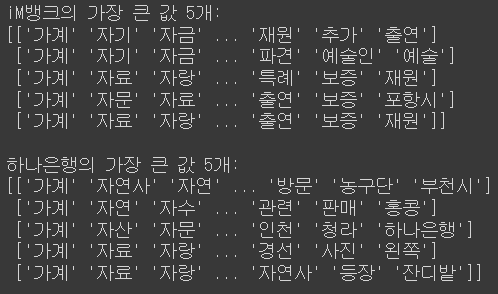

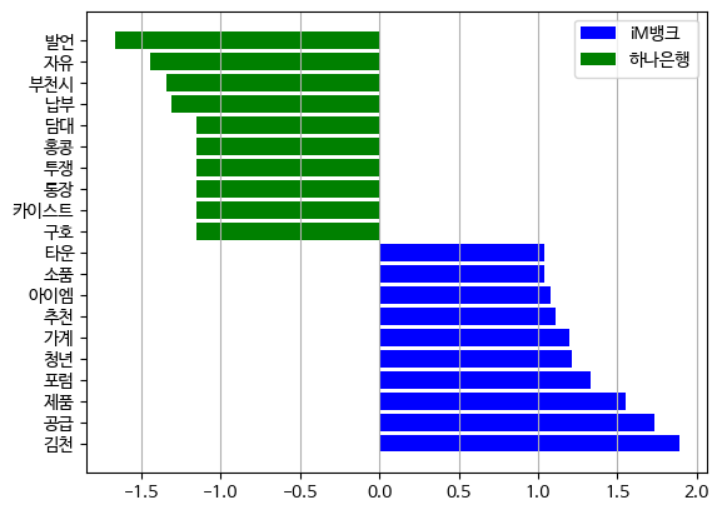



- 1) iM뱅크의 주요 단어들

주요 단어: 가계, 자기, 자금, 재원, 출연, 김천, 공급, 제품, 포럼, 청년

해석: iM뱅크는 주로 가계와 관련된 금융 서비스나 제품에 초점을 맞추고 있으며, 특히 청년층을 대상으로 하는 금융상품이 중요하게 언급되고 있습니다. 김천이라는 지역명이 자주 언급되는 것으로 보아, 특정 지역이나 커뮤니티와의 연결성이 강조되고 있을 가능성이 있습니다. 공급, 제품 등의 단어는 iM뱅크가 제공하는 상품의 다양성을 나타낼 수 있습니다. 이러한 단어들은 iM뱅크의 사회적 이미지가 보다 개인화되고 지역 사회와 밀접하게 연관되어 있음을 시사합니다.


- 2) 하나은행의 주요 단어들

주요 단어: 자연사, 자유, 부천시, 납부, 담대, 홍콩, 투쟁, 통장, 카이스트

해석: 하나은행은 보다 넓은 범위의 사회적 이슈와 연관되어 있는 것으로 보입니다. 자유, 투쟁과 같은 단어는 사회적 또는 정치적 맥락과 연결될 수 있으며, 고객층이 더 다양하다는 것을 암시합니다. 부천시와 같은 지역명이 등장하는 것도 지역사회의 문제를 다루고 있다는 것을 나타냅니다. 또한, 카이스트와의 연관은 하나은행이 학술 또는 연구기관과의 협력 관계를 형성하고 있다는 것을 시사합니다.



- 3) 두 은행 간의 차이점 분석

고객층: iM뱅크는 주로 가계와 청년층을 대상으로 하는 반면, 하나은행은 보다 폭넓은 사회적 이슈와 연결되어 다양한 고객층을 포괄하는 것처럼 보입니다.


사회적 이미지: iM뱅크는 개인화된 서비스와 지역사회 중심의 이미지를 강조하는 반면, 하나은행은 광범위한 사회적 이슈를 다루고 있으며, 더 많은 사회적 책임과 연결된 이미지를 갖고 있는 것으로 보입니다.


단어의 맥락: iM뱅크는 주로 금융상품과 서비스에 대한 이야기를 중심으로 하고 있는 반면, 하나은행은 사회적 문제나 특정 지역과의 연관성이 강조되는 것으로 해석됩니다.

- 4) 인사이트

- 은행의 전략: iM뱅크는 지역사회와 고객을 밀접하게 연결시키는 전략을 유지하면서, 젊은 세대를 타겟으로 하는 특화된 금융 상품을 개발하는 것이 중요합니다. 이는 경쟁이 치열한 금융 시장에서 차별화된 서비스를 제공할 수 있는 좋은 방법이 될 것입니다.


- 하나은행의 접근: 하나은행은 사회적 책임을 다하며, 지역사회와의 연계를 강화하는 동시에, 다양한 고객의 니즈를 충족시키는 방향으로 나아가야 합니다. 특히, 학술 및 연구기관과의 협업을 통해 혁신적인 금융 상품과 서비스를 개발하는 것도 고려해 볼 만합니다.


- 미래 방향성: 두 은행 모두 지속적인 사회적 요구와 고객의 변화하는 요구에 맞춰 유연하게 대응하는 전략이 필요합니다. 고객의 신뢰를 얻고 지속 가능한 성장을 이루기 위해서는, 각 기업이 속한 지역사회와 적극적으로 소통하고 협력하는 것이 중요합니다.